# TP063743 Lee Wen Ze

# Import libraries and dataset

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.python.keras.models import Sequential,Model
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.python.keras.layers import Dense,Embedding,Flatten,Input,Concatenate, Reshape, Dropout,merge,Activation,LSTM,GRU,SimpleRNN,Conv1D, MaxPooling1D, Flatten
from tensorflow.python.keras.layers import merge
import pandas as pd
import numpy as np
#! pip install categorical_embedder
#import categorical_embedder as ce

In [62]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')


In [63]:
#method in pandas is used to count the number of unique values in each column of a DataFrame. 
df.nunique()

holiday                   11
temp                    5843
rain_1h                  372
snow_1h                   12
clouds_all                60
weather_main              11
weather_description       38
date_time              40575
traffic_volume          6704
dtype: int64

In [64]:
df['holiday'].unique()

array([nan, 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [65]:
df['weather_main'].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [66]:
df['weather_description'].unique()


array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog',
       'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'], dtype=object)

In [67]:
# display the data type of each column in the DataFrame
df.dtypes

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object

In [68]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

# Display the missing values count for each column
print(missing_values)

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64


In [69]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df[df.duplicated()]

# Count the number of duplicate rows
duplicate_count = len(duplicate_rows)

# Display the count of duplicate rows
print("Duplicate rows count:", duplicate_count)

Duplicate rows count: 17


In [70]:
# Generate statistical summary for the dataset
summary_stats = df.describe()

# Display the statistical summary
print(summary_stats)

               temp       rain_1h       snow_1h    clouds_all  traffic_volume
count  48204.000000  48204.000000  48204.000000  48204.000000    48204.000000
mean     281.205870      0.334264      0.000222     49.362231     3259.818355
std       13.338232     44.789133      0.008168     39.015750     1986.860670
min        0.000000      0.000000      0.000000      0.000000        0.000000
25%      272.160000      0.000000      0.000000      1.000000     1193.000000
50%      282.450000      0.000000      0.000000     64.000000     3380.000000
75%      291.806000      0.000000      0.000000     90.000000     4933.000000
max      310.070000   9831.300000      0.510000    100.000000     7280.000000


In [71]:
# Convert to date_time format 

df['date_time_new'] = pd.to_datetime(df['date_time'])
df.shape

(48204, 10)

In [72]:
# The DataFrame is first indexed by the 'date_time_new' column using 'set_index('date_time_new')'
# The 'resample('H')' method is then used to resample the DataFrame at hourly intervals ('H' stands for hourly)
# The 'first()' method is applied to each hourly interval to select the first value in each interval
# The result is stored in the variable 'abc', which represents the resampled DataFrame with hourly intervals and the first value of each interval
row_count_before_resample = len(df)
print(row_count_before_resample)

# Resample df_t to hourly intervals and get the count of rows for each hour
abc = df.set_index('date_time_new').resample('H').first()

# Calculate the number of rows in abc after resampling
row_count_after_resample = len(abc)
rows_inserted = row_count_after_resample - row_count_before_resample
print("Number of rows inserted into abc after resampling:", rows_inserted)

abc.shape

#WHY? This type of operation is common in time series analysis, where you may need to aggregate or downsample high-frequency data into lower-frequency intervals for analysis or visualization purposes.

48204
Number of rows inserted into abc after resampling: 4347


(52551, 9)

In [73]:
abc 

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
date_time_new,,,,,,,,,
2012-10-02 09:00:00,None,288.28,0.0,0.0,40.0,Clouds,scattered clouds,2012-10-02 09:00:00,5545.0
2012-10-02 10:00:00,None,289.36,0.0,0.0,75.0,Clouds,broken clouds,2012-10-02 10:00:00,4516.0
2012-10-02 11:00:00,None,289.58,0.0,0.0,90.0,Clouds,overcast clouds,2012-10-02 11:00:00,4767.0
2012-10-02 12:00:00,None,290.13,0.0,0.0,90.0,Clouds,overcast clouds,2012-10-02 12:00:00,5026.0
2012-10-02 13:00:00,None,291.14,0.0,0.0,75.0,Clouds,broken clouds,2012-10-02 13:00:00,4918.0
...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,None,283.45,0.0,0.0,75.0,Clouds,broken clouds,2018-09-30 19:00:00,3543.0
2018-09-30 20:00:00,None,282.76,0.0,0.0,90.0,Clouds,overcast clouds,2018-09-30 20:00:00,2781.0
2018-09-30 21:00:00,None,282.73,0.0,0.0,90.0,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159.0


In [74]:
abc['date_time_new'] = abc.index

In [75]:
abc['Day_Week'] = abc['date_time_new'].apply(lambda x: x.weekday())

In [76]:
# The lambda function checks if the 'Day_Week' value is in the list [1, 2, 3, 4, 5] (Monday to Friday)
# If the 'Day_Week' value is in the list, the lambda function assigns 0 to the 'Weekend' column (weekday)
Week_day_list = [1, 2, 3, 4, 5]
abc['Weekend'] = abc['Day_Week'].apply(lambda x: 0 if x in Week_day_list else 1)

In [77]:
abc['date_time'] = pd.to_datetime(abc['date_time'])
abc

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,date_time_new,Day_Week,Weekend
date_time_new,,,,,,,,,,,,
2012-10-02 09:00:00,None,288.28,0.0,0.0,40.0,Clouds,scattered clouds,2012-10-02 09:00:00,5545.0,2012-10-02 09:00:00,1,0
2012-10-02 10:00:00,None,289.36,0.0,0.0,75.0,Clouds,broken clouds,2012-10-02 10:00:00,4516.0,2012-10-02 10:00:00,1,0
2012-10-02 11:00:00,None,289.58,0.0,0.0,90.0,Clouds,overcast clouds,2012-10-02 11:00:00,4767.0,2012-10-02 11:00:00,1,0
2012-10-02 12:00:00,None,290.13,0.0,0.0,90.0,Clouds,overcast clouds,2012-10-02 12:00:00,5026.0,2012-10-02 12:00:00,1,0
2012-10-02 13:00:00,None,291.14,0.0,0.0,75.0,Clouds,broken clouds,2012-10-02 13:00:00,4918.0,2012-10-02 13:00:00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,None,283.45,0.0,0.0,75.0,Clouds,broken clouds,2018-09-30 19:00:00,3543.0,2018-09-30 19:00:00,6,1
2018-09-30 20:00:00,None,282.76,0.0,0.0,90.0,Clouds,overcast clouds,2018-09-30 20:00:00,2781.0,2018-09-30 20:00:00,6,1
2018-09-30 21:00:00,None,282.73,0.0,0.0,90.0,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159.0,2018-09-30 21:00:00,6,1


In [78]:
abc.dtypes

holiday                        object
temp                          float64
rain_1h                       float64
snow_1h                       float64
clouds_all                    float64
weather_main                   object
weather_description            object
date_time              datetime64[ns]
traffic_volume                float64
date_time_new          datetime64[ns]
Day_Week                        int64
Weekend                         int64
dtype: object

In [79]:
abc.isnull().sum()

holiday                52498
temp                   11976
rain_1h                11976
snow_1h                11976
clouds_all             11976
weather_main           11976
weather_description    11976
date_time              11976
traffic_volume         11976
date_time_new              0
Day_Week                   0
Weekend                    0
dtype: int64

In [80]:
abc.date_time.fillna(value=(abc.date_time_new),inplace=True)

In [81]:
abc.drop(['date_time_new'],inplace=True,axis=1)

In [82]:
abc.isnull().sum()

holiday                52498
temp                   11976
rain_1h                11976
snow_1h                11976
clouds_all             11976
weather_main           11976
weather_description    11976
date_time                  0
traffic_volume         11976
Day_Week                   0
Weekend                    0
dtype: int64

In [83]:
abc.dtypes

holiday                        object
temp                          float64
rain_1h                       float64
snow_1h                       float64
clouds_all                    float64
weather_main                   object
weather_description            object
date_time              datetime64[ns]
traffic_volume                float64
Day_Week                        int64
Weekend                         int64
dtype: object

# Outlier Checking

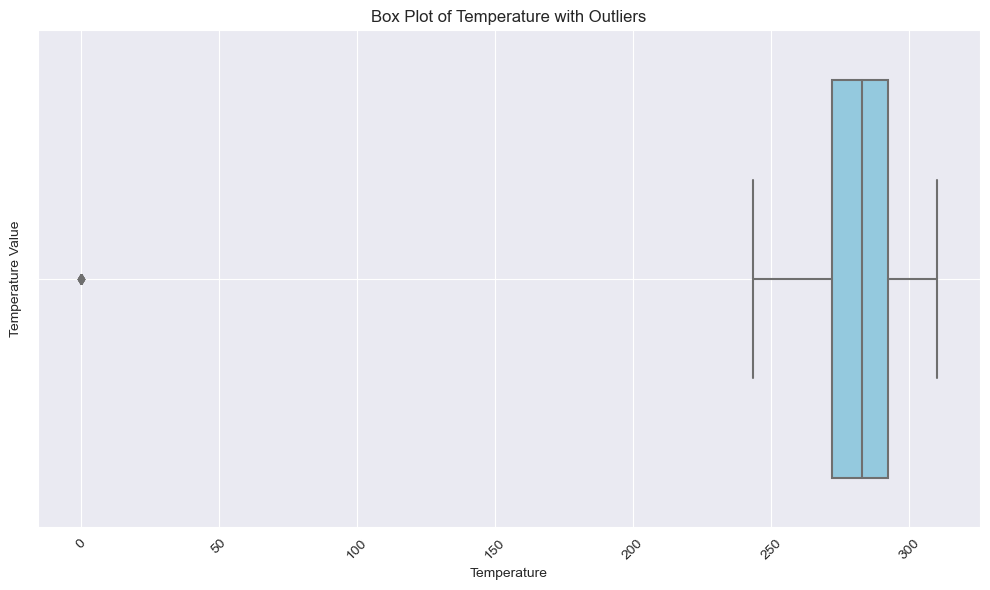

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing temperature data
# Plotting a box plot to visualize temperature outliers with rotated x-axis labels
plt.figure(figsize=(10, 6))
sns.boxplot(x='temp', data=abc, color='skyblue')
plt.xlabel('Temperature')
plt.ylabel('Temperature Value')
plt.title('Box Plot of Temperature with Outliers')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.grid(True)
plt.tight_layout()
plt.show()

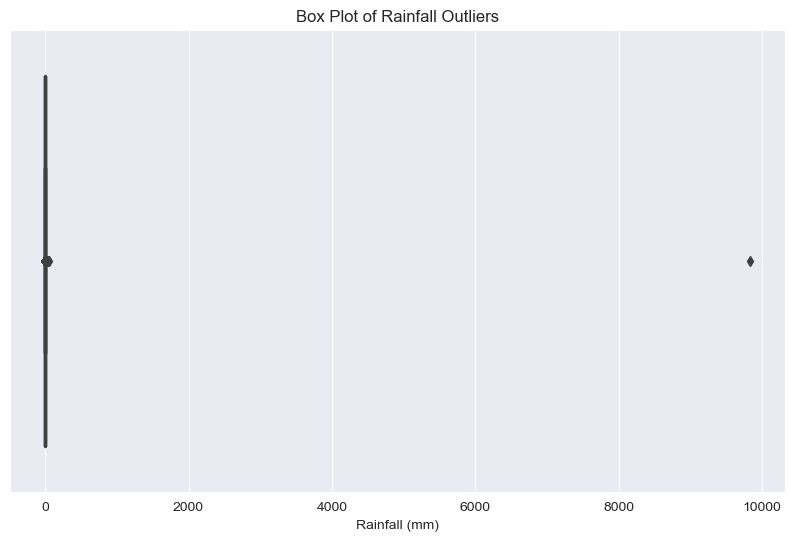

In [110]:
import seaborn as sns

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.boxplot(x=abc['rain_1h'], orient='h', linewidth=2.5)
plt.xlabel('Rainfall (mm)')
plt.title('Box Plot of Rainfall Outliers')
plt.show()

# Traffic Volume Plot

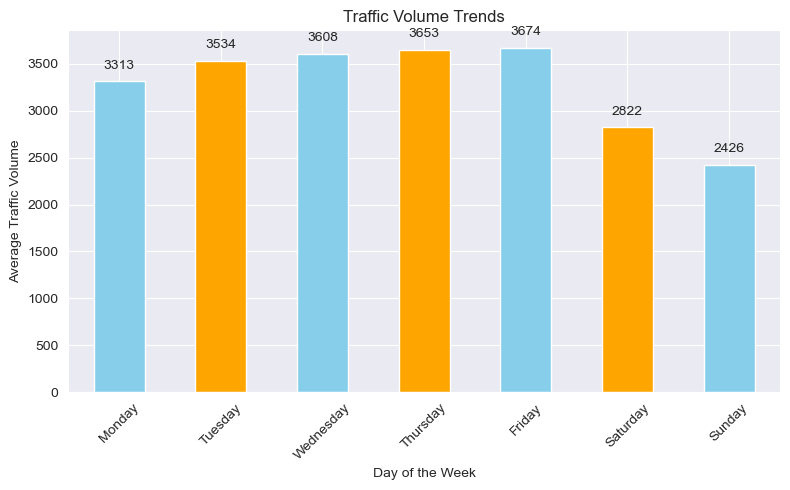

In [84]:
# Group by 'Day_Week' and calculate average traffic volume
traffic_by_day = abc.groupby('Day_Week')['traffic_volume'].mean()

# Plotting the traffic volume trends for weekdays and weekends
plt.figure(figsize=(8, 5))
bars = traffic_by_day.plot(kind='bar', color=['skyblue', 'orange'])
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic Volume')
plt.title('Traffic Volume Trends')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.ylim(0, None)  # Optional: Set y-axis limit if needed

# Adding count labels on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 100, f'{int(bar.get_height())}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Holiday Plot

In [85]:
abc1 = abc

# Find the indices of rows where the holiday is not "None" and is not NaN
ind = abc1[(abc1['holiday'] != "None") & (~abc1['holiday'].isna())].index

# Iterate over the indices
for idx in ind:
    # Extract the date part from the datetime
    date_val = abc1.loc[idx, 'date_time'].date()
    
    # Update the 'holiday' column for the entire day with the holiday value
    abc1.loc[abc1['date_time'].dt.date == date_val, 'holiday'] = abc1.loc[idx, 'holiday']
abc1['holiday'] = abc1['holiday'].fillna('None') 
abc1

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Day_Week,Weekend
date_time_new,,,,,,,,,,,
2012-10-02 09:00:00,None,288.28,0.0,0.0,40.0,Clouds,scattered clouds,2012-10-02 09:00:00,5545.0,1,0
2012-10-02 10:00:00,None,289.36,0.0,0.0,75.0,Clouds,broken clouds,2012-10-02 10:00:00,4516.0,1,0
2012-10-02 11:00:00,None,289.58,0.0,0.0,90.0,Clouds,overcast clouds,2012-10-02 11:00:00,4767.0,1,0
2012-10-02 12:00:00,None,290.13,0.0,0.0,90.0,Clouds,overcast clouds,2012-10-02 12:00:00,5026.0,1,0
2012-10-02 13:00:00,None,291.14,0.0,0.0,75.0,Clouds,broken clouds,2012-10-02 13:00:00,4918.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,None,283.45,0.0,0.0,75.0,Clouds,broken clouds,2018-09-30 19:00:00,3543.0,6,1
2018-09-30 20:00:00,None,282.76,0.0,0.0,90.0,Clouds,overcast clouds,2018-09-30 20:00:00,2781.0,6,1
2018-09-30 21:00:00,None,282.73,0.0,0.0,90.0,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159.0,6,1


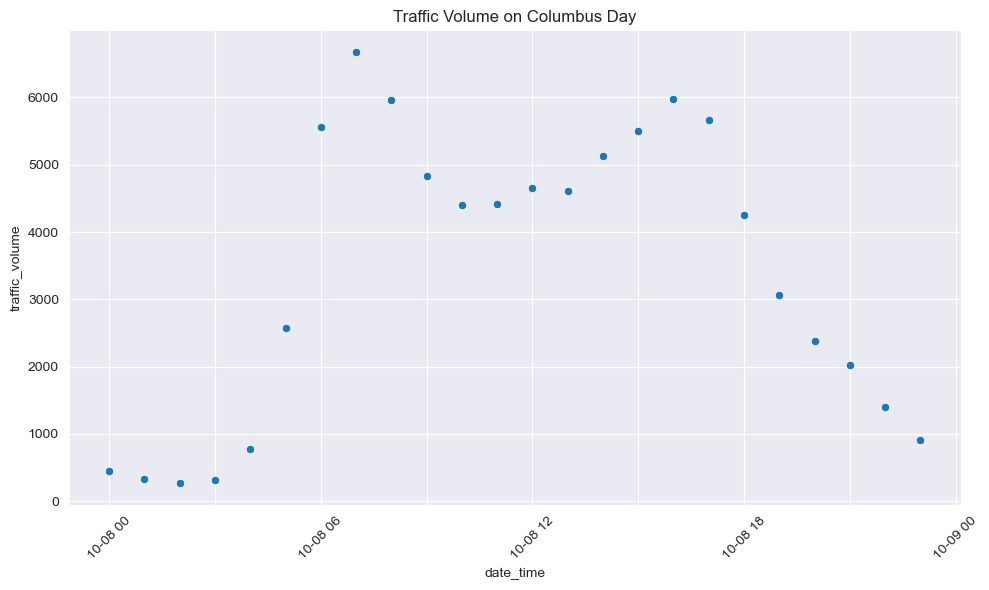

In [86]:
# Create the scatter plot for Columbus Day with 'date_time' as the x-axis
plt.figure(figsize=(10, 6))  # Set the figure size
plot = sns.scatterplot(x='date_time', y='traffic_volume', data=abc[abc['holiday'] == 'Columbus Day'].iloc[0:24])

# Set x-axis ticks to show every nth tick
n = 2  # Show every 2nd tick
for index, label in enumerate(plot.get_xticklabels()):
    if index % n != 0:
        label.set_visible(False)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title("Traffic Volume on Columbus Day")  # Add the title
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

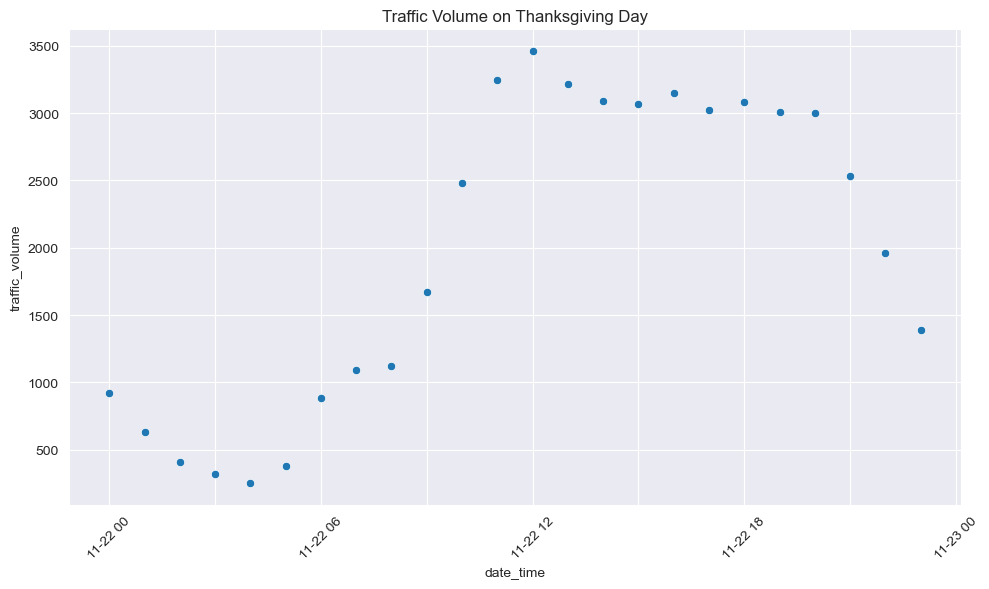

In [87]:
# Create the scatter plot for Columbus Day with 'date_time' as the x-axis
plt.figure(figsize=(10, 6))  # Set the figure size
plot = sns.scatterplot(x='date_time', y='traffic_volume', data=abc1[abc1['holiday'] == 'Thanksgiving Day'].iloc[0:24])

# Set x-axis ticks to show every nth tick
n = 2  # Show every 2nd tick
for index, label in enumerate(plot.get_xticklabels()):
    if index % n != 0:
        label.set_visible(False)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title("Traffic Volume on Thanksgiving Day")  # Add the title
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

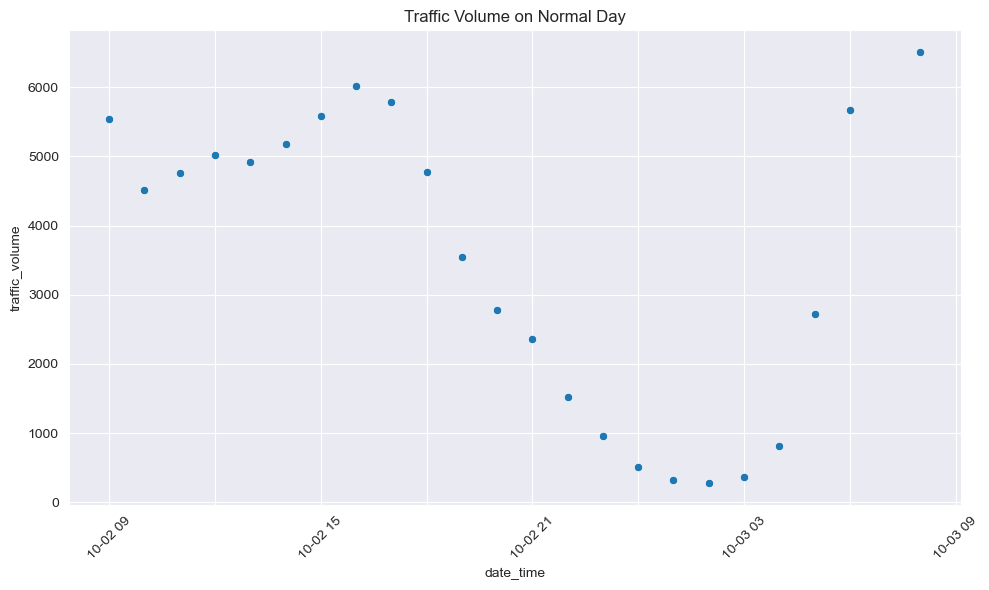

In [88]:
# Create the scatter plot for Columbus Day with 'date_time' as the x-axis
plt.figure(figsize=(10, 6))  # Set the figure size
plot = sns.scatterplot(x='date_time', y='traffic_volume', data=abc1[abc1['holiday'] == 'None'].iloc[0:24])

# Set x-axis ticks to show every nth tick
n = 2  # Show every 2nd tick
for index, label in enumerate(plot.get_xticklabels()):
    if index % n != 0:
        label.set_visible(False)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title("Traffic Volume on Normal Day")  # Add the title
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

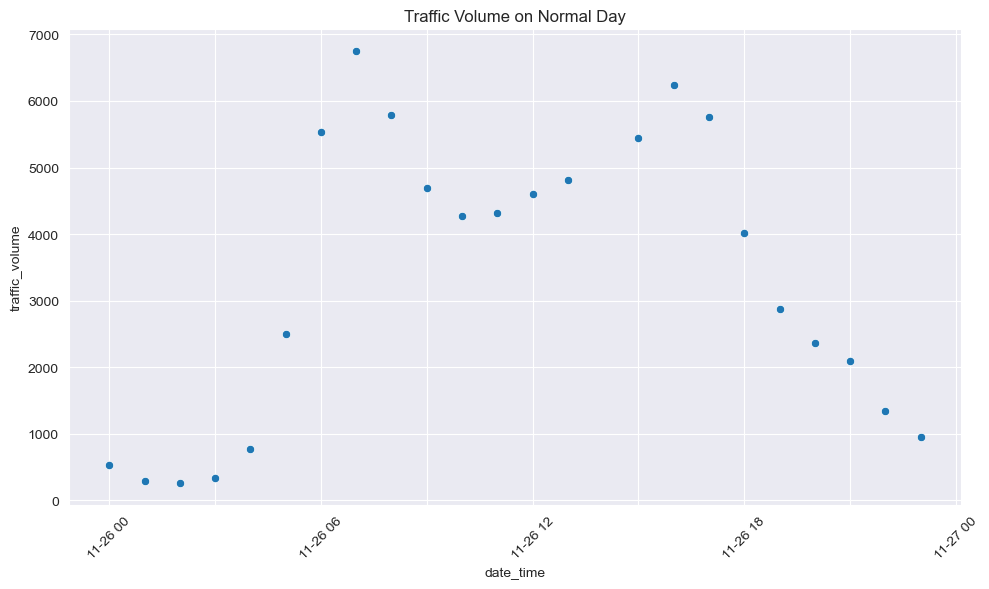

In [89]:
# Create the scatter plot for Columbus Day with 'date_time' as the x-axis
plt.figure(figsize=(10, 6))  # Set the figure size

target_date = pd.to_datetime('2012-11-26')
filtered_data = abc1[abc1['date_time'].dt.date == target_date.date()].iloc[0:24]
plot = sns.scatterplot(x='date_time', y='traffic_volume', data=filtered_data)

# Set x-axis ticks to show every nth tick
n = 2  # Show every 2nd tick
for index, label in enumerate(plot.get_xticklabels()):
    if index % n != 0:
        label.set_visible(False)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title("Traffic Volume on Normal Day")  # Add the title
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Weather Plot

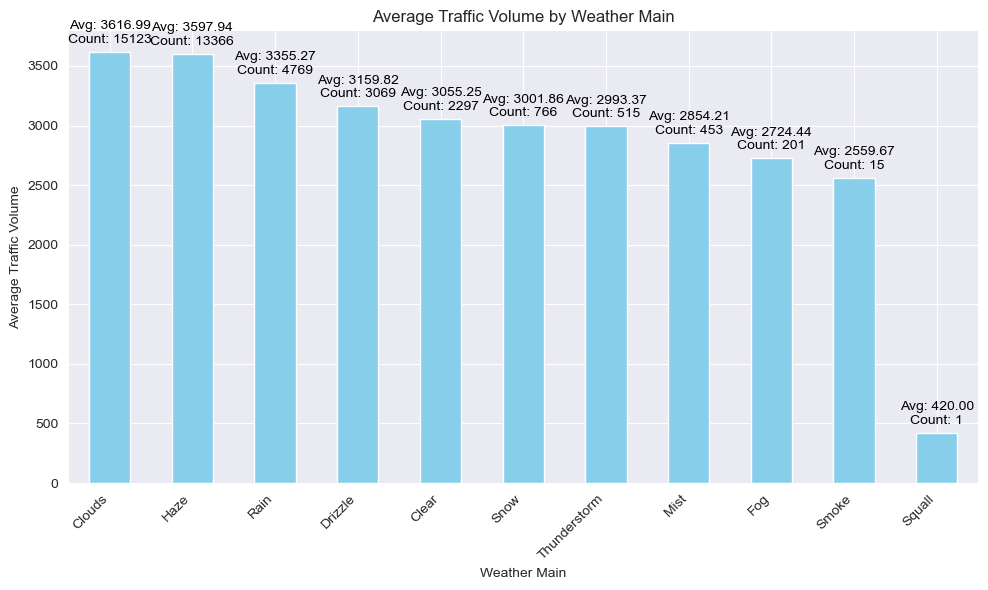

Average Traffic Volume by Weather Main:
Weather: Clouds, Avg: 3616.99, Count: 15123
Weather: Haze, Avg: 3597.94, Count: 13366
Weather: Rain, Avg: 3355.27, Count: 4769
Weather: Drizzle, Avg: 3159.82, Count: 3069
Weather: Clear, Avg: 3055.25, Count: 2297
Weather: Snow, Avg: 3001.86, Count: 766
Weather: Thunderstorm, Avg: 2993.37, Count: 515
Weather: Mist, Avg: 2854.21, Count: 453
Weather: Fog, Avg: 2724.44, Count: 201
Weather: Smoke, Avg: 2559.67, Count: 15
Weather: Squall, Avg: 420.00, Count: 1


In [105]:
import matplotlib.pyplot as plt

# Grouping by 'weather_main' and calculating the average traffic volume and count
weather_traffic_avg = abc.groupby('weather_main')['traffic_volume'].mean().sort_values(ascending=False)
weather_traffic_count = abc['weather_main'].value_counts()

# Plotting the data
plt.figure(figsize=(10, 6))
bar_plot = weather_traffic_avg.plot(kind='bar', color='skyblue')
plt.xlabel('Weather Main')
plt.ylabel('Average Traffic Volume')
plt.title('Average Traffic Volume by Weather Main')
plt.xticks(rotation=45, ha='right')

# Annotating each bar with the total number and average value
for i, (avg, count) in enumerate(zip(weather_traffic_avg, weather_traffic_count)):
    bar_plot.text(i, avg + 50, f'Avg: {avg:.2f}\nCount: {count}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# Print the average values and counts
print("Average Traffic Volume by Weather Main:")
for weather, avg, count in zip(weather_traffic_avg.index, weather_traffic_avg, weather_traffic_count):
    print(f"Weather: {weather}, Avg: {avg:.2f}, Count: {count}")

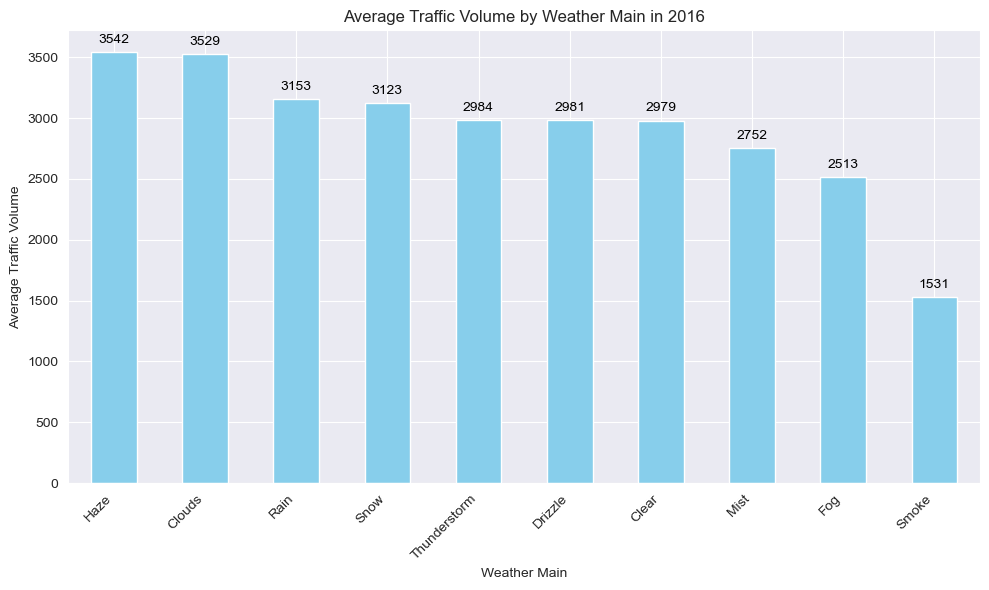

In [91]:
import matplotlib.pyplot as plt

# Filter data for the year 2016
abc_2016 = abc[abc['date_time'].dt.year == 2016]

# Grouping by 'weather_main' and calculating the average traffic volume
weather_traffic_2016 = abc_2016.groupby('weather_main')['traffic_volume'].mean().sort_values(ascending=False)

# Plotting the data
plt.figure(figsize=(10, 6))
bar_plot = weather_traffic_2016.plot(kind='bar', color='skyblue')
plt.xlabel('Weather Main')
plt.ylabel('Average Traffic Volume')
plt.title('Average Traffic Volume by Weather Main in 2016')
plt.xticks(rotation=45, ha='right')

# Annotating each bar with the total number
for i, v in enumerate(weather_traffic_2016):
    bar_plot.text(i, v + 50, str(int(v)), ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


# Cloud Plot

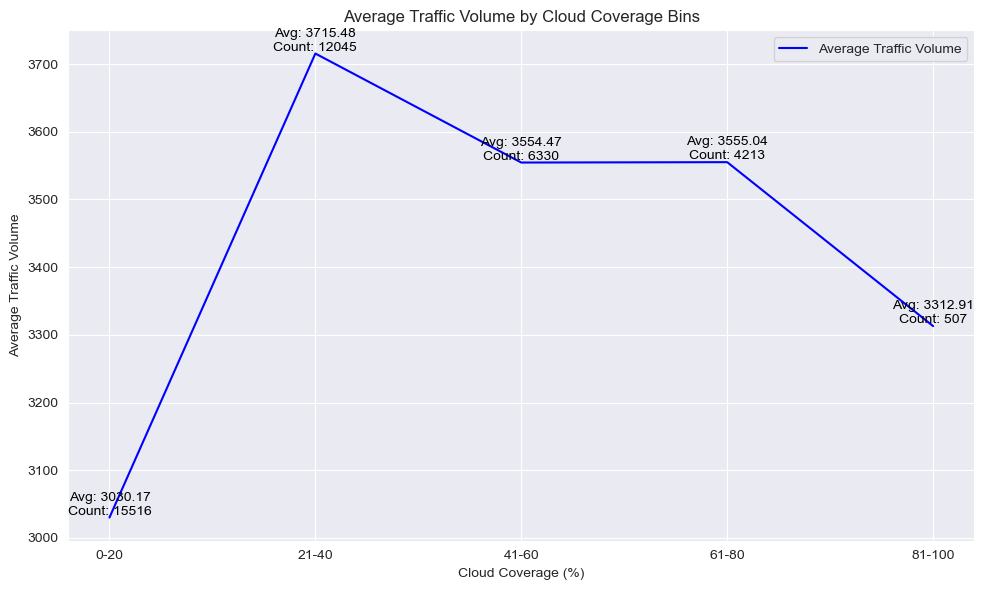

Average Traffic Volume by Cloud Coverage Bins:
Cloud Coverage Bin: 0-20, Avg Traffic Volume: 3030.17, Count: 15516
Cloud Coverage Bin: 21-40, Avg Traffic Volume: 3715.48, Count: 12045
Cloud Coverage Bin: 41-60, Avg Traffic Volume: 3554.47, Count: 6330
Cloud Coverage Bin: 61-80, Avg Traffic Volume: 3555.04, Count: 4213
Cloud Coverage Bin: 81-100, Avg Traffic Volume: 3312.91, Count: 507


In [106]:
import matplotlib.pyplot as plt
import pandas as pd

# Create bins for cloud coverage
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# Cut the data into bins and calculate average traffic volume
abc['clouds_bin'] = pd.cut(abc['clouds_all'], bins=bins, labels=labels)
avg_traffic_by_clouds_bin = abc.groupby('clouds_bin')['traffic_volume'].mean()
count_by_clouds_bin = abc['clouds_bin'].value_counts()

# Plotting the line plot for average traffic volume by cloud coverage bins
plt.figure(figsize=(10, 6))
plt.plot(avg_traffic_by_clouds_bin.index, avg_traffic_by_clouds_bin.values, label='Average Traffic Volume', color='blue')
plt.xlabel('Cloud Coverage (%)')
plt.ylabel('Average Traffic Volume')
plt.title('Average Traffic Volume by Cloud Coverage Bins')
plt.legend()
plt.grid(True)

# Annotate each end point of the line segment with the total average value and count
for i, (v_avg, v_count) in enumerate(zip(avg_traffic_by_clouds_bin.values, count_by_clouds_bin.values)):
    plt.text(avg_traffic_by_clouds_bin.index[i], v_avg, f'Avg: {round(v_avg, 2)}\nCount: {v_count}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# Print the average traffic volume and count in the console
print("Average Traffic Volume by Cloud Coverage Bins:")
for bin_label, avg_volume, count in zip(avg_traffic_by_clouds_bin.index, avg_traffic_by_clouds_bin.values, count_by_clouds_bin.values):
    print(f"Cloud Coverage Bin: {bin_label}, Avg Traffic Volume: {avg_volume:.2f}, Count: {count}")


# Temperature Plot

In [93]:
# Convert Temperature from Kelvin to Celsius scale

def kelvin_to_celsius(temp_kelvin):
    
    temp_celsius = (temp_kelvin - 273.15) 
    return temp_celsius

In [103]:
abc1 = abc.copy()
abc1['temp'] = abc['temp'].apply(kelvin_to_celsius)


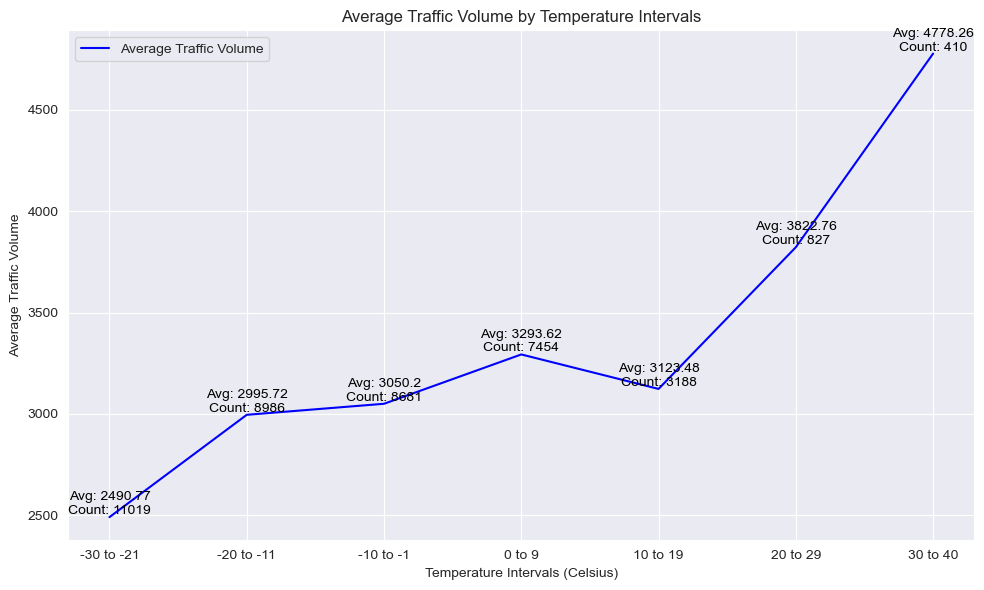

Average Traffic Volume by Temperature Intervals:
Temperature Interval: -30 to -21, Avg Traffic Volume: 2490.77, Count: 11019
Temperature Interval: -20 to -11, Avg Traffic Volume: 2995.72, Count: 8986
Temperature Interval: -10 to -1, Avg Traffic Volume: 3050.20, Count: 8681
Temperature Interval: 0 to 9, Avg Traffic Volume: 3293.62, Count: 7454
Temperature Interval: 10 to 19, Avg Traffic Volume: 3123.48, Count: 3188
Temperature Interval: 20 to 29, Avg Traffic Volume: 3822.76, Count: 827
Temperature Interval: 30 to 40, Avg Traffic Volume: 4778.26, Count: 410


In [107]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'abc1' and temperature is in Celsius
# Define temperature intervals and labels
temp_intervals = [-30, -20, -10, 0, 10, 20, 30, 40]
temp_labels = ['-30 to -21', '-20 to -11', '-10 to -1', '0 to 9', '10 to 19', '20 to 29', '30 to 40']

# Cut the data into temperature intervals and calculate average traffic volume and total counts
abc1['temp_interval'] = pd.cut(abc1['temp'], bins=temp_intervals, labels=temp_labels, right=False)
avg_traffic_by_temp = abc1.groupby('temp_interval')['traffic_volume'].mean()
count_by_temp = abc1['temp_interval'].value_counts()

# Plotting the line graph for average traffic volume by temperature intervals
plt.figure(figsize=(10, 6))
plt.plot(avg_traffic_by_temp.index, avg_traffic_by_temp.values, label='Average Traffic Volume', color='blue')
plt.xlabel('Temperature Intervals (Celsius)')
plt.ylabel('Average Traffic Volume')
plt.title('Average Traffic Volume by Temperature Intervals')
plt.legend()
plt.grid(True)

# Annotate each end point of the line segment with the total average value and count
for i, (v_avg, v_count) in enumerate(zip(avg_traffic_by_temp.values, count_by_temp.values)):
    plt.text(avg_traffic_by_temp.index[i], v_avg, f'Avg: {round(v_avg, 2)}\nCount: {v_count}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# Output in text
print("Average Traffic Volume by Temperature Intervals:")
for temp_interval, avg_volume, count in zip(avg_traffic_by_temp.index, avg_traffic_by_temp.values, count_by_temp.values):
    print(f"Temperature Interval: {temp_interval}, Avg Traffic Volume: {avg_volume:.2f}, Count: {count}")


In [108]:
abc1.to_csv('eda_traffic.csv', index=False)